# Projet: Fouille de données 1 

## Réaliser par: Nouha MTIBAA-3DNI_G1

## Thème: Classification des Tweets

## Objectifs: 
* Maitriser l’API de twitter pour l’extraction des tweets
* Maitriser la partie NLP (naturallanguageprocessing) avec NLTK en Python
* Appliquer les principes de nettoyage des données
* Classer les tweets: regrouper ensemble les tweets qui sont similaires.C’est une étape qui peut être considérée comme une étape

### Importation des bibliothéques nécessaires

In [1]:
import pandas as pd 
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install tweepy
!pip install pandas

##### On doit récupérer les Tweets à partir de Twitter en utilisant l’API de twitter et les sauvgarder dans un fichier .csv

In [26]:
def scrape_function(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T"
    consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA"
    access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT"
    access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet =2000
    scrape_function(words, date_since, numtweet) 
    print('Scraping has completed!') 

Enter Twitter HashTag to search for
sport
Enter Date since The Tweets are required in yyyy-mm--dd
01/12/2020

Tweet 1:
Username:AHSAAUpdates
Description:Providing the latest updates as the official Twitter account for the Alabama High School Athletic Association. #MoreThanAGame #ALAthlete #MyReasonWhy
Location:Montgomery, Alabama
Following Count:912
Follower Count:32836
Total Tweets:57459
Retweet Count:1
Tweet Text:No matter the sport, for @AHSAAUpdates it's always more than a game. 🏐🏈⚽️

From COVID-19  shutting down spring sports to the AHSAA Super 7 Football Championships, hear these inspiring stories from the past year. 👇
https://t.co/JwLQ72PjnV
Hashtags Used:[]

Tweet 2:
Username:naja_salim
Description:เปิดมาเพื่อตบสลิ่มปัญญาอ่อนโดยเฉพาะ
Location:
Following Count:613
Follower Count:5
Total Tweets:115
Retweet Count:9
Tweet Text:"We should be less afraid to be afraid. It's a very valid emotion and it's something we shouldn't shy away from."

Emily Harrington tells @cnnsport about her


Tweet 19:
Username:ammattipyoraily
Description:Trying to put Time, Avg. Speed, VAM, W/kg together.
Location:Finland
Following Count:923
Follower Count:30424
Total Tweets:41056
Retweet Count:0
Tweet Text:● Jakob Fuglsang is shifting his focus away from Grand Tour general classifications. (https://t.co/mHs1D9BKiQ)

● Seguros RGA prolong cooperation as co-title sponsor of ProTeam Caja Rural.

● 2021 Bora kit (📷)

● Challenge Mallorca (January 28-31) race profiles. (📷) https://t.co/S8jubFr9WA
Hashtags Used:[]

Tweet 20:
Username:bensandford12
Description:3 x New Zealand Skeleton Winter Olympian, Athlete representative, lawyer.
Location:Rotorua, Rotorua District
Following Count:607
Follower Count:424
Total Tweets:208
Retweet Count:14
Tweet Text:WADA’s Athlete Committee is disappointed with the decision of the Court of Arbitration for Sport (CAS) not to impose stricter and longer sanctions on Russia in line with those that were recommended by WADA. 

Find out more ➡️ https://t.co/WIojYTdsrh


Tweet 40:
Username:JoukoIkonen
Description:Suomen urheilun eettinen keskus SUEK ry:n tutkintapäällikkö. Finnish Center for Integrity in Sports. Chief Investigative Officer. @SUEK_FINCIS
Location:
Following Count:385
Follower Count:774
Total Tweets:808
Retweet Count:14
Tweet Text:WADA’s Athlete Committee is disappointed with the decision of the Court of Arbitration for Sport (CAS) not to impose stricter and longer sanctions on Russia in line with those that were recommended by WADA. 

Find out more ➡️ https://t.co/WIojYTdsrh https://t.co/3r9r7eb4RY
Hashtags Used:[]

Tweet 41:
Username:joyce_tyler
Description:Cinephile, balletomane, book lover, tennis addict, USC School of Cinematic Arts alum, and #ImStillWithHer
Location:Pasadena, CA
Following Count:1718
Follower Count:2053
Total Tweets:79230
Retweet Count:0
Tweet Text:I'm sure AOC was a good sport about it and isn't demanding multiple recounts. 😏
https://t.co/72TIRXmVlW
Hashtags Used:[]

Tweet 42:
Username:danroan
Description:Sports E

Tweet 61:
Username:UteAcademy
Description:Utah Student-Athlete Development Program - Building Champions for Life
Location:Salt Lake City, Utah
Following Count:332
Follower Count:261
Total Tweets:227
Retweet Count:12
Tweet Text:Congratulations to @Utah_Football TE Dalton Kincaid! He's received the 2020 Utah Athletes in Service Award, sponsored by the University's @BennionCenter. The award honors athletes who excel in their sport, in the classroom and in the community:
https://t.co/fTYgJyNW4f

#GoUtes https://t.co/WyyjwGc44Q
Hashtags Used:[]

Tweet 62:
Username:ovi100travel
Description:Discover the magic world of travel and adventure through storytelling and photography.
Location:Toronto, Ontario
Following Count:1361
Follower Count:1735
Total Tweets:2302
Retweet Count:30
Tweet Text:"We should be less afraid to be afraid. It's a very valid emotion and it's something we shouldn't shy away from."

Emily Harrington tells @cnnsport about her historic El Capitan climb and how she’s learned to 

Tweet 94:
Username:outsports
Description:The leader in LGBTQ sports news & commentary for athletes, coaches & fans. Part of @SBNation. #CourageIsContagious.
Location:Los Angeles
Following Count:2670
Follower Count:29946
Total Tweets:29548
Retweet Count:0
Tweet Text:This gay PGA member knows golf is a conservative sport. He hopes his coming-out changes perceptions #CourageIsContagious https://t.co/Gc2gGiFWyp
Hashtags Used:['CourageIsContagious']

Tweet 95:
Username:Whisper3Point0
Description:
Location:Cape Town,South Africa
Following Count:264
Follower Count:27
Total Tweets:1036
Retweet Count:1
Tweet Text:Cricket South Africa (CSA) has confirmed that results of two unnamed members of the Proteas team have returned positive for Covid-19. https://t.co/Uehv7f6MgT
Hashtags Used:[]

Tweet 96:
Username:robr0013
Description:Locomotive Engineer extraordinaire, Utes, Chargers, SF Giants, KC Royals, SL Blues.
Location:Ogden, UT 
Following Count:3549
Follower Count:1348
Total Tweets:81758
Retweet 


Tweet 127:
Username:GlobalSportASU
Description:Bridging academic research to real-life implications. Translating sport research into easily understood info. Sharing knowledge with audiences who need it most.
Location:Phoenix, AZ
Following Count:533
Follower Count:2047
Total Tweets:3939
Retweet Count:1
Tweet Text:The #GSMPod meets the final #GSMLive of the year. We're sharing the audio of our year-end episode, Predictions &amp; Provocations for Sport: 2021.

We've gathered the best and brightest in global sport, including @ilhaamg, to lend their visions for 2021. https://t.co/cvsFvlyLJl https://t.co/hcjQRaNCny
Hashtags Used:['GSMPod', 'GSMLive']

Tweet 128:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Ahmad Bin Ali Stadium: A 2022 World Cup venue with an Indian ‘touch’ https://t.co/fDOyX2kNYC
Hashtags Used:[]

Tweet 129:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Coun

Tweet 153:
Username:staronline
Description:News updates from Malaysia's top English-language daily and website
Location:Kuala Lumpur, Malaysia
Following Count:213
Follower Count:1649997
Total Tweets:385788
Retweet Count:0
Tweet Text:Atlanta name Argentine Heinze as head coach
https://t.co/Eqi3NyJ65a  https://t.co/Eqi3NyJ65a
Hashtags Used:[]

Tweet 154:
Username:SportsJobFinder
Description:Follow For The Latest Sports Jobs
Location:Worldwide
Following Count:9893
Follower Count:13917
Total Tweets:20766
Retweet Count:0
Tweet Text:Programme Support Officer (1x permanent, 1x 12-month FTC) - Sport England - £26,251 (London), £22,171 (Loughborough) - Closing date 17 December 2020 https://t.co/rAPwtm291i
Hashtags Used:[]

Tweet 155:
Username:natale_john
Description:University of Hartford Head Women's Soccer Coach
Location:Connecticut, USA
Following Count:191
Follower Count:482
Total Tweets:2574
Retweet Count:4
Tweet Text:Former Hawk Hayley Nolan ('18) was recently featured on "Ultimate Goal!" 

Tweet 179:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Premier League Preview &amp; Predictions: Gameweek 14 https://t.co/C6cFlgrGvZ
Hashtags Used:[]

Tweet 180:
Username:VirtueDominic
Description:Digital Signage|Sports Marketing Services|Creative Enthusiast.
Location:Kwame Nkrumah's Home
Following Count:2706
Follower Count:300
Total Tweets:7514
Retweet Count:30
Tweet Text:"We should be less afraid to be afraid. It's a very valid emotion and it's something we shouldn't shy away from."

Emily Harrington tells @cnnsport about her historic El Capitan climb and how she’s learned to manage fear. https://t.co/XGGOUZUhmM https://t.co/F3t3qMTwPo
Hashtags Used:[]

Tweet 181:
Username:_MEF_RL
Description:INTERNATIONAL REVOLUTIONARY PEOPLE'S
Location:
Following Count:2580
Follower Count:1662
Total Tweets:4105
Retweet Count:11
Tweet Text:https://t.co/uwkbhc7tkX
Three hunting towers destroyed in Germany.

“We ar


Tweet 213:
Username:era_murphy
Description:#DOTMHG
The audacity of hope; Free Will; Self determination
Location:
Following Count:433
Follower Count:287
Total Tweets:28868
Retweet Count:2
Tweet Text:#FloridaGators basketball player #KeyontaeJohnson breathing on his own and talking after collapsing on court - CNN https://t.co/hGaSCqXGeN
Hashtags Used:['FloridaGators', 'KeyontaeJohnson']

Tweet 214:
Username:NewshubSport
Description:Got a story tip or feedback? Email news@newshub.co.nz. #Newshub
Location:New Zealand
Following Count:310
Follower Count:8450
Total Tweets:56357
Retweet Count:0
Tweet Text:Star @BlackSticks Men trio announce retirement https://t.co/YY0jSvsFKI https://t.co/heD3P3Xiez
Hashtags Used:[]

Tweet 215:
Username:Oatcake1967
Description:Tweeting for the little guy. #Peace & #Enlightenment #InshaAllah #OpDeathEaters #CSAinquiry #CSAsurvivors #AnonFamily
Location:
Following Count:5136
Follower Count:5275
Total Tweets:533847
Retweet Count:8
Tweet Text:Who is watching your 

Following Count:386
Follower Count:62
Total Tweets:142
Retweet Count:8
Tweet Text:Who is watching your children play sport, do we re... https://t.co/6eRO8yUcYP https://t.co/9eMvqi9QpN
Hashtags Used:[]

Tweet 237:
Username:TheDailyGopher
Description:Coverage of the Minnesota Golden Gophers powered by 
@SBNation.
Location:Twin Cities
Following Count:247
Follower Count:7365
Total Tweets:24002
Retweet Count:0
Tweet Text:🚨NEW PAHDCAST!🚨

〽️Caring is creepy ‘21, summarized
🏈You know COVID is getting old when HATE WEEK doesn’t feel right.
🏀Who knew making shots mattered?
🏒All hail the sport that matters https://t.co/ckt2N3vfil
Hashtags Used:[]

Tweet 238:
Username:sport_lindep
Description:Le service des sports de l'Indépendant est sur twitter
Location:Perpignan, Narbonne, Carcassonne
Following Count:253
Follower Count:2284
Total Tweets:3579
Retweet Count:0
Tweet Text:Volley-ball : Narbonne surclasse Nice en 3 sets secs https://t.co/2JCBxcrMUY via @lindependant
Hashtags Used:[]

Tweet 239:
Use


Tweet 264:
Username:charlieEAB
Description:Father of one stunning Daughter. All views are my own.
Location:Cambridge & London 
Following Count:184
Follower Count:215
Total Tweets:3460
Retweet Count:14
Tweet Text:"This is a chance to really help drive a positive and diverse change for a sport which does require it across the world, not just in Britain"

@alicedearingx outlines her quest to become the first Black female swimmer to represent Britain at the Olympics.

https://t.co/FE880HRMFn https://t.co/z4seSwqQpq
Hashtags Used:[]

Tweet 265:
Username:cwmpwca
Description:I believe in not abusing Mother Nature. Very left wing politics.
"Animals are my friends and I don’t eat my friends"
Location:South Wales
Following Count:822
Follower Count:269
Total Tweets:5920
Retweet Count:6
Tweet Text:There is no significant difference in the way humans and horses experience the pain of being struck by a whip, according to a landmark study that researchers say should end the argument on the continued


Tweet 296:
Username:MilanEye
Description:Our eyes are everywhere, providing latest Milan news, updates, photos, videos, stats and more. #ForzaMilan
Location:
Following Count:100
Follower Count:78951
Total Tweets:89421
Retweet Count:9
Tweet Text:Gazzetta dello Sport: Ibrahimovic is also at risk of missing the Juventus game on January 6
https://t.co/RFiNuTYxBj
Hashtags Used:[]

Tweet 297:
Username:TheCheckerFlag
Description:Independent motorsport news bringing you the latest from the world of motorsport #F1, #FormulaE, #WorldRX, #WEC, #BTCC, #WRC, #MotoGP and more since 2009
Location:Cambridge, Cambridgeshire, UK
Following Count:9196
Follower Count:19665
Total Tweets:79727
Retweet Count:0
Tweet Text:Jérôme Stoll will leave his role of President of Renault Sport Racing on 31 December.
https://t.co/LEUroVPQil
Hashtags Used:[]

Tweet 298:
Username:mjon3105
Description:freelance sports journalist for British and Irish media inc  @SportsNewsIre  @EuropeanIrish  @IrishBoxingCom and http://t.c

Tweet 331:
Username:CNicGabhainn
Description:Galway girl living in London. Views my own.
Location:
Following Count:251
Follower Count:313
Total Tweets:1373
Retweet Count:8
Tweet Text:We are proud to announce the launch of the East London Talent Pathway with @Sport_England. 

Athletes from Black, Asian &amp; Minority Ethnic backgrounds will enjoy unique access to the very best facilities &amp; resources at our world-class @UELSportsDock:

https://t.co/I0ddW0f3pc https://t.co/cDstFWis5s
Hashtags Used:[]

Tweet 332:
Username:JZydowsky
Description:open minded, left leaning, sports loving, food crazy man.
Location:Bolingbrook, IL
Following Count:783
Follower Count:85
Total Tweets:14987
Retweet Count:1
Tweet Text:Historic day in Olympic sport with the first women's Nordic combined World Cup, won by an American. Background on Tara Geraghty-Moats and the fight for Olympic inclusion from @duresport https://t.co/9NzTY8ogOt 

and from @AlexAzziNBC https://t.co/0jwRf7b3Yx
Hashtags Used:[]

Tweet 3

Tweet 360:
Username:BigDave_oputa
Description:London Baller ✌🏀

insta: d.oputa_00
Location:Bexley, London / Loughborough 
Following Count:480
Follower Count:493
Total Tweets:12463
Retweet Count:12
Tweet Text:British Basketball to receive £1.35 million in UK Sport funding en route to the Paris 2024 Olympics. 

https://t.co/MLQOZzpHfj
Hashtags Used:[]

Tweet 361:
Username:destefano50
Description:Liberal - Democratic , Catholic, pro - israel.   History lover and astronomy and traveling.
Location:Verona italy
Following Count:3207
Follower Count:2167
Total Tweets:4271
Retweet Count:0
Tweet Text:The Court of Arbitration for Sport had initially slapped the country with a four-year ban but halved it on Thursday "to effect cultural change". https://t.co/SthRV17OWu
Hashtags Used:[]

Tweet 362:
Username:insidenu
Description:SB Nation's Northwestern site, with free coverage and analysis of Wildcat sports. Run by @karp_eli and @Lassimak.
Location:Evanston
Following Count:713
Follower Count:8623
Tot

Tweet 385:
Username:ThatLousyNick
Description:Loves books. Dances badly. Big fan of science, skepticism and just stuff, you know? Still hopes to grow up to be a dinosaur-riding ninja-superhero-spy-assassin.
Location:Cape Town, South Africa
Following Count:2948
Follower Count:2546
Total Tweets:1127
Retweet Count:1
Tweet Text:#MediaEntrepreneur: Myolisi Gophe launched the Cape At 6 Sport website and magazine in 2019. It is a title covering the field of amateur sports. Gophe has just published his fourth issue in what has been an extraordinarily difficult year. https://t.co/57moDfsV8U
Hashtags Used:['MediaEntrepreneur']

Tweet 386:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Jannik Sinner: “I dream to become no.1 and face Roger Federer” https://t.co/jpzUn29wz1
Hashtags Used:[]

Tweet 387:
Username:UEL_News
Description:The University of East London (UEL) is the careers-led university. Our mission is to 

Tweet 418:
Username:YourSportsEdge1
Description:https://t.co/bnMazQGn9E - 2019 winner & 2020 finalist for KBA Best Digital Product. Your place for award winning high school sports coverage & Vaught's Views
Location:Western Kentucky
Following Count:1462
Follower Count:3392
Total Tweets:36246
Retweet Count:0
Tweet Text:Check out the 2020-21 Dawson Springs boys' basketball team in this YSE photo gallery. https://t.co/Iq6Wm5uw2y https://t.co/hSXOXpzuOP
Hashtags Used:[]

Tweet 419:
Username:SportfisioSwiss
Description:Swiss Sport Physiotherapy Association SSPA
Location:
Following Count:969
Follower Count:5759
Total Tweets:15538
Retweet Count:20
Tweet Text:Let's talk about periods. 

#theAIS Female Performance &amp; Health Initiative aims to educate, provide additional research &amp; break down communication barriers around women's health in elite sport.

@ElissaMacleod @DrRachelHarris @brittneykleyn #FPHI

https://t.co/6UbUb8hOAu
Hashtags Used:['theAIS']

Tweet 420:
Username:ray_teruel
Desc

Username:iRunFar
Description:Your trail and ultrarunning resource!

Join us on Patreon: https://t.co/IukO9M7F3M
Location:
Following Count:134
Follower Count:97972
Total Tweets:35441
Retweet Count:0
Tweet Text:Read "Outside the Box," Zach Miller's essay exploring the value of internal motivation in our sport. https://t.co/atR4d31LDT

Photo: Zach Miller https://t.co/XyC7lAKeAr
Hashtags Used:[]

Tweet 452:
Username:fordhamconnect
Description:Official account of Fordham University Connect, a student-athlete run organization that aims to erase the stigma around vulnerability in sport. @fordhamrams
Location:Bronx, NY
Following Count:81
Follower Count:106
Total Tweets:85
Retweet Count:2
Tweet Text:.@JessFishlock is an icon of Welsh sport. She's received another huge honor, being added to the Stonewall Sport Championships team to end their annual #RainbowLaces campaign https://t.co/U3ilUSQGG9
Hashtags Used:[]

Tweet 453:
Username:markbritball
Description:Content, communications, journalism, br

Tweet 479:
Username:JenkinsonLeslie
Description:#MMAFamily #PureEvilMMA #MMATwitter #natearmy #BKFC #MMA #UFC #Boxing #RGR #Bellator #Wrestling #WWE #MMAholes #FightNerds
Location:Ottawa, Ontario
Following Count:24318
Follower Count:22109
Total Tweets:279193
Retweet Count:7
Tweet Text:Khabib Nurmagomedov becomes first MMA fighter to win BBC World Sport Star award https://t.co/ofN2QX89DO
Hashtags Used:[]

Tweet 480:
Username:GlennClarkRadio
Description:@PressBoxOnline, https://t.co/sczlvcQL69, @jobbingoutshow, Loyola/Stevenson PBP voice; Stan Lee said I'm a quote Hell of a Good Interviewer unquote
Location:Baltimore
Following Count:2999
Follower Count:4223
Total Tweets:81509
Retweet Count:0
Tweet Text:To read more about what @LenElmore is talking about and the work he and the Knight Commission are doing, go to https://t.co/A7vasehPQ0
Hashtags Used:[]

Tweet 481:
Username:BASIS_org
Description:The British Association for Sustainable Sport
Location:UK
Following Count:1883
Follower Count:1


Tweet 509:
Username:Yogi21211
Description:Baby boomer, ávido lector, consultor en riesgos psicosociales.
Location:CDMX
Following Count:582
Follower Count:377
Total Tweets:14147
Retweet Count:33
Tweet Text:"We should be less afraid to be afraid. It's a very valid emotion and it's something we shouldn't shy away from."

Emily Harrington tells @cnnsport about her historic El Capitan climb and how she’s learned to manage fear. https://t.co/XGGOUZCGve https://t.co/xRkcOl09xx
Hashtags Used:[]

Tweet 510:
Username:sergimagugliani
Description:No Compromise 🍀🎗
Location:Milano, Lombardia
Following Count:3259
Follower Count:2586
Total Tweets:453519
Retweet Count:33
Tweet Text:"We should be less afraid to be afraid. It's a very valid emotion and it's something we shouldn't shy away from."

Emily Harrington tells @cnnsport about her historic El Capitan climb and how she’s learned to manage fear. https://t.co/XGGOUZCGve https://t.co/xRkcOl09xx
Hashtags Used:[]

Tweet 511:
Username:tkail10
Descripti

Tweet 540:
Username:petermoyo6
Description:Specialist Investigative Journalist, CNN MultiChoice Africa Journalist of the year. Retweets are not endorsements
Location:JOHANNESBURG, South Africa
Following Count:3539
Follower Count:2488
Total Tweets:71276
Retweet Count:1
Tweet Text:Safa president Danny Jordaan says the picture of footballers losing their lives in car accidents is depressing and urgent measures must be put in place to prevent more deaths. https://t.co/3Tb6JQSlbw
Hashtags Used:[]

Tweet 541:
Username:ExpressandStar
Description:Breaking news and sport from the Express & Star | Email us at newsdesk@expressandstar.co.uk
Location:Wolverhampton
Following Count:3849
Follower Count:151505
Total Tweets:195671
Retweet Count:0
Tweet Text:Nuno Espirito Santo is hoping Wolves duo Leander Dendoncker and Willy Boly will be fit for Monday's trip to Burnley #wwfc 

https://t.co/HjgbplEZRd
Hashtags Used:['wwfc']

Tweet 542:
Username:jmontagna4
Description:
Location:San Francisco Bay Area
Fo


Tweet 565:
Username:mariacpois
Description:fighting for .JulianAssange 💛💝
Location:Lisboeta. 
Following Count:82
Follower Count:585
Total Tweets:128571
Retweet Count:0
Tweet Text:Emily Harrington:

 'We should be less afraid to be afraid,' says climber after making history on El Capitan - CNN  https://t.co/cggyowCWmb
Hashtags Used:[]

Tweet 566:
Username:TrentMeacham
Description:Jesus Follower • Husband • Father • 9 year Pro 🏀 • Pod🎙”Greater Than a Game” • Newsletter ✍🏼 • Financial Advisor 📈
Location:Champaign, IL
Following Count:134
Follower Count:2780
Total Tweets:2607
Retweet Count:0
Tweet Text:Our lives are measured by #moments, and we have the power to create them.

How sports can teach us to become ‘moment-makers’. 👊🏼

https://t.co/tqmaeosTz9
Hashtags Used:['moments']

Tweet 567:
Username:slpecho
Description:Updates from Park's official student-run news source.
Location:St. Louis Park High School
Following Count:630
Follower Count:1077
Total Tweets:3426
Retweet Count:1
Tweet Tex


Tweet 594:
Username:nzaccardi
Description:@NBCSports Olympics. nick.zaccardi@nbcuni.com.
Location:NYC
Following Count:7007
Follower Count:12554
Total Tweets:38942
Retweet Count:2
Tweet Text:The last sport left without female representation at the Olympics was contested on the top international level for the first time today. An American led the way. https://t.co/ztcMd89yQ5 https://t.co/QvawEpRXPK
Hashtags Used:[]

Tweet 595:
Username:Deegley
Description:Fan of Life. Like to Laugh. USWNT, NWSL, Houston Dash, FFCFrankfurt, FCBayernMunich,  Fortuna Hjørring, Göteborg, CanberraUnited
Location:Colorado Springs,Colorado,USA
Following Count:1118
Follower Count:1175
Total Tweets:124093
Retweet Count:2
Tweet Text:.@JessFishlock is an icon of Welsh sport. She's received another huge honor, being added to the Stonewall Sport Championships team to end their annual #RainbowLaces campaign https://t.co/U3ilUSQGG9
Hashtags Used:[]

Tweet 596:
Username:140group
Description:Digital Due Diligence, Portf


Tweet 617:
Username:manatweets
Description:Android Developer & Trainer. Follow me for last Android news. Listen Free This Before any Job Interview: The Job Interview Success Tune https://t.co/aLzLzRzP05
Location:World
Following Count:10005
Follower Count:9082
Total Tweets:108858
Retweet Count:0
Tweet Text:☑ The swimmer poised to make British Olympic history #BreakingNews #cnn #PleaseRetweet ➡ https://t.co/S7LIQ4ugXD https://t.co/KH053ii9EB
Hashtags Used:['BreakingNews', 'cnn', 'PleaseRetweet']

Tweet 618:
Username:StateTab
Description:News around the world
Location:
Following Count:1039
Follower Count:325
Total Tweets:7132
Retweet Count:0
Tweet Text:England World Cup hero Jason Robinson is looking to get children active in sport https://t.co/9I7EolJzkP
Hashtags Used:[]

Tweet 619:
Username:GalwayLSP
Description:GSP promotes particiation in sport and physical activity in Galway.
Location:Galway, Ireland
Following Count:341
Follower Count:492
Total Tweets:1333
Retweet Count:6
Tweet Text


Tweet 643:
Username:Liverpool_SSP
Description:The Official School Sports Partnership account. Supporting & Developing young people’s Physical, Social & Emotional Well-Being through Sport #LSSP
Location:Liverpool, England
Following Count:505
Follower Count:3090
Total Tweets:7982
Retweet Count:1
Tweet Text:Each class has enjoyed taking on the @Liverpool_SSP Bubbleball challenge in recent weeks! https://t.co/6MeiWVCqJe
Hashtags Used:[]

Tweet 644:
Username:ExpressandStar
Description:Breaking news and sport from the Express & Star | Email us at newsdesk@expressandstar.co.uk
Location:Wolverhampton
Following Count:3849
Follower Count:151505
Total Tweets:195671
Retweet Count:0
Tweet Text:Cameron Norman admits renewed confidence has been key to his impressive form in Walsall colours #saddlers 

https://t.co/ZdzKBZ7jy5
Hashtags Used:['saddlers']

Tweet 645:
Username:ShropshireStar
Description:Breaking news and sport from the Shropshire Star | Email us at newsroom@shropshirestar.co.uk.
Location

Tweet 669:
Username:JenneferAhlste1
Description:😈 100% natural 🔥😈 This is my ONLY Twitter account 👄
Location:
Following Count:1001
Follower Count:47
Total Tweets:71
Retweet Count:55
Tweet Text:NYT 🚨-- Russia’s Doping Ban Is Halved by Court of Arbitration for Sport, But Remain Banned From Next 2 Olympics and Soccer World Cup in 2022

https://t.co/vyuwXa5SEa
Hashtags Used:[]

Tweet 670:
Username:Birminghamnews7
Description:News from around Birmingham and West Midlands
Location:
Following Count:208
Follower Count:175
Total Tweets:35851
Retweet Count:2
Tweet Text:Nuno Espirito Santo says Wolves fans’ favourite Jonny Castro Otto is ‘doing a fantastic job’ in his recovery from a serious knee injury #wwfc 

https://t.co/rLy5P1pcdi
Hashtags Used:[]

Tweet 671:
Username:thecompletebody
Description:Now is the perfect time to get fit and build some muscle. Grab your copy of bodybuilding EBook here https://t.co/vXgRbDxEyT 

#muscle #abs #fit #exercise
Location:
Following Count:54
Follower Count:61


Tweet 690:
Username:cha_rendon
Description:Franca en valorar al humano
#Socióloga #UAMX #DataAnalyst
Location:CDMX
Following Count:883
Follower Count:595
Total Tweets:14876
Retweet Count:0
Tweet Text:Strava’s 2020 Year in Sport finds activity &amp; growth in a pandemic, plus 700 Everestings https://t.co/h0UUellHHt vía @bikerumor
Hashtags Used:[]

Tweet 691:
Username:AndreMueller10
Description:What, me worry?
Location:Mad 
Following Count:224
Follower Count:200
Total Tweets:4861
Retweet Count:11
Tweet Text:https://t.co/uwkbhc7tkX
Three hunting towers destroyed in Germany.

“We are the Animal Liberation Front and we will come back to defend the forest.
More towers will fall until they stop this so-called sport, which is nothing else but murder.

Smash speciesism!” https://t.co/IHtCTX21zk
Hashtags Used:[]

Tweet 692:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Megan Rapinoe explains why her place in F

Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:‘I feel like I’ve known Rafael Nadal for a long time’, says WTA star https://t.co/4pFiJ61J4j
Hashtags Used:[]

Tweet 712:
Username:27BOSTANCI
Description:Tek aşk ALLAH aşkı, diğer hesabımlarım @bostanci_27 @Bostanci27Fb @BostanciFb27
Gaziantep - Denizli💛💙🇹🇷
Location:Türkiye
Following Count:4196
Follower Count:4307
Total Tweets:42551
Retweet Count:1
Tweet Text:😊😂😂Beter ol Bein sport https://t.co/HmdvUUKnoV
Hashtags Used:[]

Tweet 713:
Username:WBJonline
Description:The Washington Business Journal keeps you in the loop on what's happening in the Greater Washington business community.
Location:Washington, D.C.
Following Count:680
Follower Count:32846
Total Tweets:80326
Retweet Count:0
Tweet Text:Running might seem like an act of solitude. But for Chris Farley of Pacers Running, it's the community around the sport he's missed this year with the cancellation of

Tweet 739:
Username:ShropshireStar
Description:Breaking news and sport from the Shropshire Star | Email us at newsroom@shropshirestar.co.uk.
Location:Shropshire, UK
Following Count:3053
Follower Count:89966
Total Tweets:117122
Retweet Count:0
Tweet Text:AFC Telford United boss Gavin Cowan is exploring the possibility of extending Eddie Jones’ loan spell #Bucks 

https://t.co/CTlBZMMv48
Hashtags Used:['Bucks']

Tweet 740:
Username:irishnewssport
Description:Sports news, analysis and more from the Irish News.
Location:Belfast
Following Count:1474
Follower Count:31778
Total Tweets:61454
Retweet Count:0
Tweet Text:Kieran Donaghy hopes he can add a “half a percent” to the Armagh footballers after accepting Kieran McGeeney’s offer to join his backroom team ahead of the 2021 season - and revealed he’s already being chided by his Tyrone relations for the surprise move

https://t.co/pycbDPZqyC
Hashtags Used:[]

Tweet 741:
Username:ExpressandStar
Description:Breaking news and sport from the Expr

Username:SwaziBridge
Description:The Swazi Bridge Project is working to bridge the #digitalDivide in #eSwatini. 🇸🇿 #Africa info@swazibridgeproject.org join our team at https://t.co/Lof2G338uV
Location:eSwatini and Washington DC
Following Count:479
Follower Count:291
Total Tweets:21389
Retweet Count:0
Tweet Text:RT AfricaBizRadio: 📣 New Podcast! "Bronze Wins Gold, Son Blames Team-Mates For Puskas Award" on @Spreaker https://t.co/XXK3Xg0wcR
Hashtags Used:[]

Tweet 766:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Jota recovery from knee injury ‘going well’ but no Liverpool return date set https://t.co/Ll05jkFjTT
Hashtags Used:[]

Tweet 767:
Username:JubalandBae
Description:
Location:
Following Count:329
Follower Count:208
Total Tweets:344
Retweet Count:0
Tweet Text:“Sport has the power to change the world. It has the power to inspire. It has the power to unite people in a way that little else does. It 


Tweet 785:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Marc Rosset: ‘Roger Federer should consider skipping the Australian Open’ https://t.co/YFdXQNmnSI
Hashtags Used:[]

Tweet 786:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:‘I have always liked Roger Federer’s playing and…’, says young ace https://t.co/pcZfVArNsB
Hashtags Used:[]

Tweet 787:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:0
Tweet Text:🏏 "To see the work that happened on Day 1 and then at the end of today to see how much runs are at a premium … to look back at that first session and see 4-11 you would be devastated to see HOW it happened." @dirk_nannes on Grandstand at Stumps. https://t.co/e80WZFRjxN #AUSvIND
Hashtags Used:['AUSvIND']

Tweet 7

Description:Come live in my heart and pay no rent.
Location:
Following Count:51
Follower Count:27
Total Tweets:3399
Retweet Count:0
Tweet Text:@null Russia's doping ban reduced to two years, Court of Arbitration for Sport rules R  https://t.co/w7KiwOJiqX
Hashtags Used:[]

Tweet 810:
Username:banci__
Description:(:
Location:
Following Count:57
Follower Count:31
Total Tweets:3408
Retweet Count:0
Tweet Text:@null Russia's doping ban reduced to two years, Court of Arbitration for Sport rules R  https://t.co/h6CXP9Nv76
Hashtags Used:[]

Tweet 811:
Username:mkhkhkh212
Description:I help entrepreneurs GROW their business w/ social media! Keynote speaker, Forbes Top 10 Social Media Influencer. Live Video Pro. Loves God, family & hockey!
Location:القاهرة, مصر
Following Count:260
Follower Count:55
Total Tweets:12715
Retweet Count:0
Tweet Text:'We should be less afraid to be afraid,' says historic El Capitan climber https://t.co/Hg93AdgoVP
Hashtags Used:[]

Tweet 812:
Username:RyanEckford
Descrip

Location:
Following Count:154
Follower Count:154
Total Tweets:11671
Retweet Count:1
Tweet Text:“I am really just truly grateful for my health, to be alive, and looking forward to recovering" 

World champion Lewis Hamilton ‘grateful for his health and being alive’ after COVID-19 scare: https://t.co/i8F6xhxkQg
Hashtags Used:[]

Tweet 849:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:2
Tweet Text:🏏😍 Cummins gets Shaw early and the Aussies have some momentum before the end of play.

📰💻 BLOG: https://t.co/K3qwKismZq
📻📱 LISTEN: https://t.co/ikuCRqJWc5 #AUSvIND

https://t.co/WfKU3AJCx4
Hashtags Used:['AUSvIND']

Tweet 850:
Username:UkXafe
Description:
Location:
Following Count:154
Follower Count:154
Total Tweets:11671
Retweet Count:5
Tweet Text:"The last two weeks, starting with Greg Clarke, the Anton Ferdinand doc (and the FA response), events at Paris St Germain and Millwall have left 


Tweet 879:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:0
Tweet Text:🏏 That could've ended a lot worse … 

Australia has recovered from an early collapse, ending up skittled for 191 and trailing India by 53 runs at the change of innings. 🇦🇺🇮🇳

📰💻 BLOG: https://t.co/4WACtfmQZQ
📻📱 LISTEN: https://t.co/KqaI4YOdVr #AUSvIND https://t.co/F30hEOSQlY
Hashtags Used:['AUSvIND']

Tweet 880:
Username:gulftoday
Description:Keeping you informed on news and opinions from the UAE and the Middle East.
Location:UAE, Sharjah
Following Count:51
Follower Count:52096
Total Tweets:203329
Retweet Count:0
Tweet Text:Jacob Duffy and Tim Seifert star as New Zealand beat  Pakistan by five wickets in first T20I #NZvPAK  https://t.co/2d0vE58Ajm
Hashtags Used:['NZvPAK']

Tweet 881:
Username:CMurphRRGL
Description:⚪️⚫️☘️ Old Belvedere Women
Location:
Following Count:1965
Follower Count:474
Total Tweets:3767
Retw

Tweet 903:
Username:nancyneff2
Description:Often the smallest person in any given room of adults...former VP of Maui Chamber of Commerce.
Location:Colorful Culver City CA
Following Count:4989
Follower Count:2620
Total Tweets:295743
Retweet Count:0
Tweet Text:'We should be less afraid to be afraid,' says Emily Harrington after historic El Capitan climb
https://t.co/BJrZxkHn50
Hashtags Used:[]

Tweet 904:
Username:officialbantams
Description:The official Twitter home of Bradford City Football Club | #BCAFC | #CityForAll
Location:Bradford, West Yorkshire
Following Count:249
Follower Count:102841
Total Tweets:57100
Retweet Count:1
Tweet Text:📒 REMINDER | You can purchase copies of The Parader: Issue 1️⃣1️⃣ - which draws inspiration from a classic 1️⃣9️⃣7️⃣3️⃣ edition - online now! 

➡️ | Read: https://t.co/eLC33c3eZ6 

🛒 | Shop: https://t.co/hKOjQ27hB8 

#BCAFC | #CityForAll https://t.co/wBRQhaCjnz
Hashtags Used:['BCAFC', 'CityForAll']

Tweet 905:
Username:CSM_Worldwide
Description:We are 


Tweet 936:
Username:Black_Ocelot
Description:Socialism, Anime, San Antonio Spurs, Baltimore Ravens, Chelsea, 76ers and Eagles. I swear. He/Him.

'I would rather be a pig than a fascist' - Porco Rosso 🔞
Location:
Following Count:2482
Follower Count:1865
Total Tweets:74873
Retweet Count:29
Tweet Text:"If causing disappointment was an Olympic sport, Starmer would be a gold medalist."

New from @Rachael_Swindon 

https://t.co/gE7CyR0AKI
Hashtags Used:[]

Tweet 937:
Username:WindsorCP_Sport
Description:Mr Chaplin here with updates on PE and Sport at Windsor CP School. 2019/20: Boccia City Champions; Y3/4 Athletics Finalists
Location:Toxteth, Liverpool, UK
Following Count:94
Follower Count:137
Total Tweets:571
Retweet Count:1
Tweet Text:Each class has enjoyed taking on the @Liverpool_SSP Bubbleball challenge in recent weeks! https://t.co/6MeiWVCqJe
Hashtags Used:[]

Tweet 938:
Username:Fadumo_oo
Description:Self-proclaimed GIFs gal // Sport-ish person 🎙 // Always at @womenssport, big suppor


Tweet 963:
Username:WomenSportTrust
Description:National charity raising the visibility and increasing the impact of women’s sport. #UNLOCKED | Great sport is great sport.
Location:London, UK
Following Count:1672
Follower Count:42511
Total Tweets:25237
Retweet Count:2
Tweet Text:Meet the sportswomen who twinned an elite career with life on the frontline in 2020 https://t.co/FEKLp9yGth
Hashtags Used:[]

Tweet 964:
Username:irishnewssport
Description:Sports news, analysis and more from the Irish News.
Location:Belfast
Following Count:1474
Follower Count:31778
Total Tweets:61454
Retweet Count:1
Tweet Text:Dublin's Rock. A huge battle awaits says Dubs' forward Dean 

https://t.co/TMRSnXUOYL
Hashtags Used:[]

Tweet 965:
Username:irish_news
Description:News, sport, comment and more from The Irish News. Sign up for our free daily newsletters: https://t.co/bg9BWFHL5x
Location:Belfast, Northern Ireland
Following Count:1334
Follower Count:94984
Total Tweets:114173
Retweet Count:1
Tweet Text:No 


Tweet 989:
Username:SunTimesDaily
Description:SA's first daily digital edition, comprising eclectic, surprising and off-agenda news coverage. For open-minded South Africans. Cover pic: Alon Skuy
Location:Johannesburg, South Africa
Following Count:118
Follower Count:2891
Total Tweets:18841
Retweet Count:0
Tweet Text:An in-depth conversation with the man who helped build one of SA’s most successful clubs https://t.co/gEI8aPG3Qx
Hashtags Used:[]

Tweet 990:
Username:NewshubSport
Description:Got a story tip or feedback? Email news@newshub.co.nz. #Newshub
Location:New Zealand
Following Count:310
Follower Count:8450
Total Tweets:56357
Retweet Count:0
Tweet Text:Jacob Duffy's incredible debut paces NZ to opening T20 victory, https://t.co/seyDAJqVp0 https://t.co/LSq2icyMgm
Hashtags Used:[]

Tweet 991:
Username:boxingwarrior
Description:The UK's biggest amateur boxing website bringing you up to date news, views, reviews and results!
Location:United Kingdom
Following Count:662
Follower Count:17


Tweet 1021:
Username:wwfcglover
Description:@wolves
Location:
Following Count:1381
Follower Count:950
Total Tweets:21731
Retweet Count:10
Tweet Text:Jonny Castro Otto is doing a 'fantastic job' in his recovery from a serious knee injury. Still no definite time frame as Wolves are making sure not to rush him and cause a setback, but a spring return could well be on the cards. #wwfc  https://t.co/rM1rWCBdIy
Hashtags Used:[]

Tweet 1022:
Username:JoeEdwards_Star
Description:Wolves correspondent for @ExpressandStar.
Location:Wolverhampton
Following Count:775
Follower Count:16396
Total Tweets:15293
Retweet Count:10
Tweet Text:Jonny Castro Otto is doing a 'fantastic job' in his recovery from a serious knee injury. Still no definite time frame as Wolves are making sure not to rush him and cause a setback, but a spring return could well be on the cards. #wwfc  https://t.co/rM1rWCBdIy
Hashtags Used:['wwfc']

Tweet 1023:
Username:CarsandTrucks13
Description:Cars and Trucks, Motors. Selected Ite


Tweet 1048:
Username:BillEsteem
Description:USA, ABCNews, NBCNews, Twitter Moments, Reuters, BBCNews, Popular Culture, World News, Technology News, Follow Back    -- Jumanji App https://t.co/jxErMjJD7w --
Location:🇺🇸 
Following Count:4780
Follower Count:4787
Total Tweets:4547
Retweet Count:1
Tweet Text:Bucs could be without striking duo for trip to Angola: Orlando Pirates could be forced to soldier on without two of their main strikers, Zakhele Lepasa and Tshegofatso Mabasa, when they face Sagrada Esperanca of Angola away in the CAF Confederation Cup… https://t.co/HDVmyvtGnJ https://t.co/pBKOO6qNdB
Hashtags Used:[]

Tweet 1049:
Username:SABreakingNews
Description:All the latest breaking news from across South Africa in one stream. info@sabreakingnews.co.za
Location:South Africa
Following Count:3364
Follower Count:770348
Total Tweets:432571
Retweet Count:2
Tweet Text:Manyama feels Chiefs are heading in the right direction: Struggling Kaizer Chiefs will face another tough assignment whe

Tweet 1074:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Caf Champions League: Simba SC signing Lwanga left out of FC Platinum clash https://t.co/TPFuaSj48X
Hashtags Used:[]

Tweet 1075:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:1
Tweet Text:🏏 OUT! The Aussies are dropping like flies as debutant Cameron Green is caught on 11 by Virat Kohli. Ashwin has 3-21 in his 8th over.

🇦🇺🇮🇳 Australia 5-79 and trailing by 165.

📻📱 LISTEN: https://t.co/a7ONxT48wX
📰💻 BLOG: https://t.co/EK4gwwgF6z #AUSvIND
Hashtags Used:['AUSvIND']

Tweet 1076:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Kaizer Chiefs announce ‘historic and proud moment’ https://t.co/1bZa0mUaEW
Hashtags Used:[]

Tweet 1077:
Username:SheppNewsSport
Descript

Tweet 1103:
Username:SowetanLIVE
Description:It’s what you know that determines how far you can go. Visit https://t.co/yT8GWGck3Z to know more. #KnowYourPlace
Location:Johannesburg, South Africa
Following Count:4433
Follower Count:964434
Total Tweets:148932
Retweet Count:0
Tweet Text:Safa president Danny Jordaan says urgent measures needed to stop footballers dying and getting injured on the roads @BraMahlatse 
 https://t.co/7bJfFTae9g
Hashtags Used:[]

Tweet 1104:
Username:Birminghamnews7
Description:News from around Birmingham and West Midlands
Location:
Following Count:208
Follower Count:175
Total Tweets:35851
Retweet Count:2
Tweet Text:Huge domination for @AVFCOfficial, but ultimately spoils shared at Villa Park 

@mjmarr_star's full time #avfc report 

https://t.co/Jjt4dPdz2u
Hashtags Used:['avfc']

Tweet 1105:
Username:solopallone
Description:SoloPallone è il tweet dell'omonimo blog sul mondo del calcio italiano e internazionale.
Location:
Following Count:194
Follower Count:557
T


Tweet 1128:
Username:ComicsLord
Description:Current @Kakuchopurei writer, formerly at @Game_Revolution.
Born in Amsterdam, raised in Malaysia.
PSN/Steam: AlleefAshaari
Nintendo Switch: SW-1286-1103-2925
Location:Malaysia
Following Count:174
Follower Count:772
Total Tweets:45149
Retweet Count:1
Tweet Text:(Breaking News) Esports Returns, Now A Medal Sport At 2022 Asian Games in Hangzhou
https://t.co/EBpF2LS1oJ
Hashtags Used:[]

Tweet 1129:
Username:TelegraphSport
Description:Breaking news and live coverage from the @Telegraph Sport team.
Location:London, UK
Following Count:930
Follower Count:245017
Total Tweets:187231
Retweet Count:2
Tweet Text:Good morning, here is your daily catch-up of all the best sport (a thread)...

1. Wayne Rooney's eldest son, Kai, has followed in his father's footsteps and signed for Manchester United | @mcgrathmike (1/7)

https://t.co/8tMGjtM8h5
Hashtags Used:[]

Tweet 1130:
Username:Kakuchopurei
Description:Video game news website, events & tournaments - by 

Tweet 1167:
Username:JMGlachant
Description:Director, Florence School of Regulation | Holder, Loyola de Palacio Chair | 2018 IAEE Award for outstanding contributions to energy economics & literature
Location:Florence, Italy
Following Count:2976
Follower Count:7015
Total Tweets:76347
Retweet Count:0
Tweet Text:International Automobile Federation announced 100% renewable fuel guaranteed sustainable

permitting to achieve carbon neutrality by 2021

"Second generation biofuel exclusively refined from organic waste" is in hands of F1 engine manufacturers for testing https://t.co/KRTHnYkThv
Hashtags Used:[]

Tweet 1168:
Username:VishnuG87241402
Description:
Location:Tamil Nadu, India
Following Count:40
Follower Count:262
Total Tweets:21658
Retweet Count:2
Tweet Text:🏏 Early trouble for the Aussies after the first session.

Jasprit Bumrah claims wickets of both openers Matthew Wade and Joe Burns trapped LBW after umpires call on the DRS. 🇦🇺🇮🇳

📰💻 BLOG: https://t.co/6XqysuCCdS
📻📱 LISTEN: https


Tweet 1201:
Username:rene_horton
Description:
Location:Mernda, Melbourne
Following Count:464
Follower Count:728
Total Tweets:108532
Retweet Count:4
Tweet Text:Russia's watered-down ban described as a 'blow to clean sport' https://t.co/0DExPdexva
Hashtags Used:[]

Tweet 1202:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:0
Tweet Text:Russia's watered-down ban described as a 'blow to clean sport' https://t.co/QLuG7olwVC
Hashtags Used:[]

Tweet 1203:
Username:abcsport
Description:Your home of live sport.
Location:Australia
Following Count:1364
Follower Count:144150
Total Tweets:137693
Retweet Count:0
Tweet Text:☝️🏏 OUT! Wade falls victim LBW after a review, finishing on 8 runs as Bumrah gets the wicket.

🇦🇺🇮🇳 Australia 1-16 in the 15th over.

📻📱 LISTEN: https://t.co/WZzVqfp2Fu 
📰💻 BLOG: https://t.co/tT48ojJ8gY #AUSvIND
Hashtags Used:['AUSvIND']

Tweet 1204:
Username:Belinda76398997
De


Tweet 1235:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Robert Lewandowski Is Clearly the Right Choice for the Best FIFA Men’s Player Award https://t.co/9A4UJukkrA
Hashtags Used:[]

Tweet 1236:
Username:LawrieWoodman
Description:Coach Developer/Sport Development (17 Seasons @AFLCoaching to 2017), ACC, Curious Learner, Sports Fan, Reader, Australian Football (AFL), Rock'n'Roll, Family.
Location:Melbourne, Victoria
Following Count:720
Follower Count:445
Total Tweets:3232
Retweet Count:21
Tweet Text:Let's talk about periods. 

#theAIS Female Performance &amp; Health Initiative aims to educate, provide additional research &amp; break down communication barriers around women's health in elite sport.

@ElissaMacleod @DrRachelHarris @brittneykleyn #FPHI

https://t.co/6UbUb8hOAu
Hashtags Used:['theAIS']

Tweet 1237:
Username:kimfairley1
Description:Our lives are a collage of our memories. Our words provide

Tweet 1259:
Username:NewsPrime1012
Description:We need to know the #truth
Location:
Following Count:312
Follower Count:153
Total Tweets:44240
Retweet Count:1
Tweet Text:A Swiss court on Thursday upheld doping sanctions that will prevent Russian athletes from competing at major international events under the country's flag, but halved the period of the ban to two from four years. https://t.co/r4H0ICfl7e
Hashtags Used:[]

Tweet 1260:
Username:collec_sport
Description:NY Giants, Eli Manning, Christmas Relic Cards, RJ Barrett,Kerry Collins,  Allan Houston,Celebrity Autos/Relics,95-99 inserts!THE RODNEY HAMPTON SUPER COLLECTOR!
Location:
Following Count:2664
Follower Count:9375
Total Tweets:173816
Retweet Count:2
Tweet Text:Big Blue Cardboard:Was it All An Illusion? 
Follow link to see my mail day from @ChasinTheGraph :
https://t.co/0cwS95wQ9S https://t.co/EQMcU7tVNF
Hashtags Used:[]

Tweet 1261:
Username:staronline
Description:News updates from Malaysia's top English-language daily and web

Tweet 1289:
Username:michelangeloruc
Description:How great is it to live in a mountain village that is no longer marked on the map?
Location:Roccacinquemiglia/Adelaide
Following Count:1601
Follower Count:10174
Total Tweets:18055
Retweet Count:2
Tweet Text:EXCLUSIVE to Indaily https://t.co/fzUdNeTtAK - Why Andrew McLeod cannot stay inside the Crows empire; why he cannot stop loving the people who are the heart and soul of his club ⁦@indaily⁩  https://t.co/mncrl9f024
Hashtags Used:[]

Tweet 1290:
Username:arneduncan
Description:Managing Partner, Emerson Collective. #ChicagoCRED.    Author of How Schools Work
Location:Chicago, IL
Following Count:276
Follower Count:45734
Total Tweets:15187
Retweet Count:3
Tweet Text:Co-chair @arneduncan tells @SmittySBJ that our proposal to separate the sport of FBS football from @NCAA D-I to a new, independent entity is rooted in “the wildly disproportionate impact of football on everything else.” #collegesports
https://t.co/LJDsSTIWrp
Hashtags Used:[]

T


Tweet 1319:
Username:rich_steidler
Description:
Location:Bismarck, ND
Following Count:129
Follower Count:120
Total Tweets:319
Retweet Count:14
Tweet Text:This week's Sport's Spotlight features St. Mary’s Reece Barnhardt. https://t.co/HE0NoDIKJ2
Hashtags Used:[]

Tweet 1320:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Russia Banned From Qatar 2022 World Cup https://t.co/kvB5l2Zowy
Hashtags Used:[]

Tweet 1321:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Ole Gunnar Solskjaer Provides Injury Update on Edinson Cavani https://t.co/9FP75T0kIa
Hashtags Used:[]

Tweet 1322:
Username:CarClassified_
Description:results on the edge😀
Location:
Following Count:1242
Follower Count:39
Total Tweets:14018
Retweet Count:0
Tweet Text:2018 Honda Accord Sport White used for sale - Used Cars for Sale
https://t.co/rZC4gvms6n https://t

Tweet 1348:
Username:virtu4ld0ll
Description:.ෆ˟̑*̑t*̑˟̑ෆ.₊̣̇ ｡:°ஐ ⋆⑅˚₊ ◌༉‧ ˚₊· ͟͟͞͞➳❥ ♡.°୭̥ ୨୧ ⋆¸*ೃ☼ ๑ˊૢᵕˋૢ๑ they/them ｡⋆ʚ♡⃛ɞ ୭̥⋆*｡ ₊̣̇.ෆ˟̑*̑˚̑*̑˟̑ෆ.₊̣̇. ୨୧ ˻˳˯ₑ*॰¨̮ ๑՞. ༊*·˚ ◌¨̮͚ *.ﾟ ⋆ฺ｡*:･ ༉‧₊˚✧ ੈ♡
Location:online
Following Count:86
Follower Count:3
Total Tweets:33
Retweet Count:321
Tweet Text:Breaking, or elite breakdancing, will make its Olympics debut at Paris 2024, officials say https://t.co/uy7gsX3nZK
Hashtags Used:[]

Tweet 1349:
Username:RosalieArruda
Description:Jornalista, blogueira e colunista Tribuna do Norte.
Location:Natal/RN
Following Count:1622
Follower Count:5091
Total Tweets:61547
Retweet Count:0
Tweet Text:Torcedor do Sport Recife vence o Fifa Fan Award 2020 https://t.co/O02o7nR4rw
Hashtags Used:[]

Tweet 1350:
Username:collec_sport
Description:NY Giants, Eli Manning, Christmas Relic Cards, RJ Barrett,Kerry Collins,  Allan Houston,Celebrity Autos/Relics,95-99 inserts!THE RODNEY HAMPTON SUPER COLLECTOR!
Location:
Following Count:2664
Follower Count:9375
Total Tweets


Tweet 1379:
Username:Stoombhoy
Description:Interviewer for MMA UK News.

Blue belt under Marcos Nardini at MNBJJ Scotland.
Location:Glasvegas
Following Count:838
Follower Count:348
Total Tweets:489
Retweet Count:3
Tweet Text:Khabib Nurmagomedov has been named the #BBC’s World Sport Star of the Year 

#KhabibNurmagomedov #UFC #MMANews #UFC #MMATwitter

https://t.co/qEpOSmigA6
Hashtags Used:['BBC', 'KhabibNurmagomedov', 'UFC', 'MMANews', 'UFC']

Tweet 1380:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:‘The ease Roger Federer has in finding the rhythm is incredible’, says top coach https://t.co/kTJUM0341D
Hashtags Used:[]

Tweet 1381:
Username:WeAreMMAUK
Description:We are MMA UK! Follow us for all #UFC, #Bellator, #CageWarriors & all #MMA related news. #MMAUK
Location:United Kingdom
Following Count:1542
Follower Count:7694
Total Tweets:34368
Retweet Count:3
Tweet Text:Khabib Nurmagomedov has been name


Tweet 1410:
Username:RolandoRMoreno
Description:Growing LegalShield to 1Bill. Crush it at any age. Beach Handball, Olympic Handball . Keeping it Positive. KIP.
Location:Greater San Diego, CA.
Following Count:3825
Follower Count:530
Total Tweets:4952
Retweet Count:3
Tweet Text:Sponsors for Michael Jordan and Denny Hamlin's new Nascar team want their marketing to go beyond the track, and beyond simple advertising, to promote diversity and inclusion. And driver Bubba Wallace wants to lead those efforts https://t.co/rr1uY2w3T2 https://t.co/CV9OmpIdW6
Hashtags Used:[]

Tweet 1411:
Username:WTBdotcom
Description:Welcome to The Buzz! We've got everything from sports, entertainment, music, movies, podcasts, and more. https://t.co/Tx1xEKSWVP
Location:
Following Count:1219
Follower Count:360
Total Tweets:325
Retweet Count:3
Tweet Text:-@NFL @Seahawks @WashingtonNFL @espn #sport #football Turn UP the Fire, Seahawks https://t.co/xRbUstTw1Q
Hashtags Used:['sport', 'football']

Tweet 1412:
Username


Tweet 1441:
Username:todaymynews1
Description:Latest News On Business, Politics, Sports, Entertainment & Much More From India And Around The World At todaymynews.
#News #GujaratNews #latestNews
Location:Gandhinagar
Following Count:2208
Follower Count:334
Total Tweets:47410
Retweet Count:0
Tweet Text:Sports Ministry Recognises Yogasana As Competitive Sport | Other Sports News https://t.co/hFpb0l18av
Hashtags Used:[]

Tweet 1442:
Username:staronline
Description:News updates from Malaysia's top English-language daily and website
Location:Kuala Lumpur, Malaysia
Following Count:213
Follower Count:1649997
Total Tweets:385788
Retweet Count:0
Tweet Text:Been there, done that - Tan brings wealth of experience to BAM
https://t.co/SYMX01re6c  https://t.co/SYMX01re6c
Hashtags Used:[]

Tweet 1443:
Username:staronline
Description:News updates from Malaysia's top English-language daily and website
Location:Kuala Lumpur, Malaysia
Following Count:213
Follower Count:1649997
Total Tweets:385788
Retweet 


Tweet 1471:
Username:BrianTSchlaf
Description:
Location:
Following Count:3883
Follower Count:166
Total Tweets:37098
Retweet Count:3
Tweet Text:.@TheAHL &amp; @ECHL, along with their clubs, are joining the #NHL’s Hockey Is For Everyone campaign, a program in tandem with the NHLPA focused on supporting and fostering an inclusive culture within the sport (@Markjburns88).

https://t.co/l3v7llUF4T https://t.co/thb3WXWf9x
Hashtags Used:['NHL']

Tweet 1472:
Username:linleymackenzie
Description:Journalist
Location:
Following Count:309
Follower Count:524
Total Tweets:1256
Retweet Count:7
Tweet Text:Join The Irish Times Sport Ireland Sportswoman of the Year Awards ceremony this Friday at 12.30pm to celebrate all the winners and find out who will claim the overall trophy. Register for free access. @sportireland #ITSportswoman #WomenInSportIRE 

https://t.co/Nj3Zf6kIil
Hashtags Used:[]

Tweet 1473:
Username:MirelaCornea1
Description:
Location:
Following Count:102
Follower Count:15
Total Tweets:22


Tweet 1500:
Username:irishnewssport
Description:Sports news, analysis and more from the Irish News.
Location:Belfast
Following Count:1474
Follower Count:31778
Total Tweets:61454
Retweet Count:0
Tweet Text:Eamonn Fitzmaurice backs new coach Kieran Donaghy to make Armagh more solid 

https://t.co/nPb7EYh7M3
Hashtags Used:[]

Tweet 1501:
Username:SheppNewsSport
Description:Goulburn Valley's premier sports news service. Email us: sport@sheppnews.com.au Follow us: @tylermaher5, @alexmitchy_, @aydinpayne and @liamnash77
Location:Shepparton
Following Count:93
Follower Count:2745
Total Tweets:6174
Retweet Count:0
Tweet Text:Haisman Shield - Top clash to finish off the year. https://t.co/Lzg7xswbip
Hashtags Used:[]

Tweet 1502:
Username:ChochilinoRadio
Description:
Location:
Following Count:27
Follower Count:95
Total Tweets:291490
Retweet Count:0
Tweet Text:Maria Sharapova gets engaged with Alexander Gilkes: ‘Our Little Secret’ https://t.co/jnCcsSZQMF
Hashtags Used:[]

Tweet 1503:
Username:mak


Tweet 1531:
Username:BusinessLiveSA
Description:The best of Business Day, Financial Mail, Business Times, RDM and more, plus live business, politics and markets news all day.
Location:Johannesburg
Following Count:504
Follower Count:28425
Total Tweets:147361
Retweet Count:0
Tweet Text:Industrious Kohli rescues India in Adelaide examination https://t.co/v1Eyc5xMrq
Hashtags Used:[]

Tweet 1532:
Username:me_yu_Ci
Description:Yuzuru Hanyu♪Evgenia Medvedeva♪kaori Sakamoto♪Satoko Miyahara♪お絵描き(´-`)(´・ω・`  )最近は花寧々沼へ・・

最近は、週末のみお楽しみ程度で🐴
Location:Japan
Following Count:231
Follower Count:200
Total Tweets:23786
Retweet Count:55
Tweet Text:NYT 🚨-- Russia’s Doping Ban Is Halved by Court of Arbitration for Sport, But Remain Banned From Next 2 Olympics and Soccer World Cup in 2022

https://t.co/vyuwXa5SEa
Hashtags Used:[]

Tweet 1533:
Username:peters_malcolm
Description:Farmer, Regional Australia advocate. Father, grandfather and ordinary bloke.
Location:ashford nsw
Following Count:3699
Follower Coun

Tweet 1562:
Username:linda_maddison
Description:I'm a Bible Christian, live an organic lifestyle, I love God, Jesus, my family & friends, cooking, gardening, wildlife, walking, reading, & watching cricket :)
Location:Hexham, United Kingdom
Following Count:1
Follower Count:12
Total Tweets:6572
Retweet Count:0
Tweet Text:Pick your England team for second Test versus West Indies https://t.co/9SK9ctSdgk via @BBCSport
Hashtags Used:[]

Tweet 1563:
Username:TimesLIVE
Description:🧐News, features and analysis from our newsroom https://t.co/qL4LClV629📱💻For Sunday's best reads follow @sundaytimesza📰For Smart News follow @SunTimesDaily🧠
Location:Johannesburg, South Africa
Following Count:947
Follower Count:1496042
Total Tweets:305888
Retweet Count:0
Tweet Text:A Swiss court on Thursday upheld doping sanctions that will prevent Russian athletes from competing at major international events under the country's flag, but halved the period of the ban to two from four years. https://t.co/6BcGovG1kw
Has

Tweet 1582:
Username:wellynews
Description:Just a small shell script. Trawling for news and goings on from around the Welly webspace. Also available as an RSS feed https://t.co/gOtRlQpHAD
Location:Wellington, New Zealand
Following Count:507
Follower Count:2951
Total Tweets:40188
Retweet Count:0
Tweet Text:College Sport Wellington - A Leap of Faith – Matthew Bealing https://t.co/Eio6JlXlfo
Hashtags Used:[]

Tweet 1583:
Username:wellynews
Description:Just a small shell script. Trawling for news and goings on from around the Welly webspace. Also available as an RSS feed https://t.co/gOtRlQpHAD
Location:Wellington, New Zealand
Following Count:507
Follower Count:2951
Total Tweets:40188
Retweet Count:0
Tweet Text:College Sport Wellington - Success in the Field at NZSSA Championships for Hewitt Family https://t.co/NX9tkUoIV8
Hashtags Used:[]

Tweet 1584:
Username:wellynews
Description:Just a small shell script. Trawling for news and goings on from around the Welly webspace. Also available as 

Tweet 1606:
Username:thetalentguru
Description:🇬🇧1) #ElephantonDisneyPlus 🎙️ by MM #InspiredByMeghan #Netflix #SussexSquad #InspiredByHarry 2) #TCM & 3) DAY JOB ➡️Casting /Talent scout UK/Hollywood/Global
Location:Global
Following Count:4050
Follower Count:2002
Total Tweets:199344
Retweet Count:16
Tweet Text:Marcus Rashford's mother Melanie Maynard has said the Manchester United forward's motivation to ensure poor children do not go hungry came from his own experiences growing up when she struggled to put food on the table. https://t.co/Z53ldZ7Qzf
Hashtags Used:[]

Tweet 1607:
Username:JonathanBrazeau
Description:Internet guy (web content / social media) for @grandslamcurl • Captain of @sportsnet.ca's floor hockey team • jon.brazeau@gmail.com
Location:Toronto
Following Count:831
Follower Count:1409
Total Tweets:6692
Retweet Count:9
Tweet Text:Women Curling Leaders’ Circle – a group of Canada’s dynamic female sport leaders, coaches and personnel – will provide five grants of up to $2,00


Tweet 1645:
Username:RedBlueConnect
Description:Old rocker with a delay pedal or 2.
Location:Edinburgh, Scotland
Following Count:156
Follower Count:43
Total Tweets:9543
Retweet Count:0
Tweet Text:GOAL - Sheffield United 1-0 Manchester United https://t.co/oeLVshzV8O via @BBCSport
Hashtags Used:[]

Tweet 1646:
Username:daniell92220400
Description:21🤘🏽
Location:
Following Count:23
Follower Count:64
Total Tweets:11684
Retweet Count:5
Tweet Text:Sam Allardyce says he accepted the Albion job for the thrill of keeping them in the Premier League.
https://t.co/x6ZKtYScfS #wba
Hashtags Used:[]

Tweet 1647:
Username:JosephMasi_Star
Description:West Bromwich Albion reporter for the @expressandstar. Proud dad to Georgie and Thomas. Big England fan.
Location:Shropshire
Following Count:456
Follower Count:10440
Total Tweets:26261
Retweet Count:5
Tweet Text:Sam Allardyce says he accepted the Albion job for the thrill of keeping them in the Premier League.
https://t.co/x6ZKtYScfS #wba
Hashtags Used:['w


Tweet 1674:
Username:killmuvs1
Description:self medicated INTROVERT with a prosthetic spirit.

Hooper.
Location:NBO  LOK
Following Count:226
Follower Count:281
Total Tweets:32150
Retweet Count:25
Tweet Text:"This is a chance to... help drive a positive and diverse change for a sport which does require it across the world, not just in Britain." 

Alice Dearing tells CNN about her quest to be the first Black female swimmer to represent Britain at the Olympics. https://t.co/HY4NzOe5uI
Hashtags Used:[]

Tweet 1675:
Username:beboshownu
Description:he/him #원위 🏳️‍⚧️🇵🇷
Location:
Following Count:1985
Follower Count:1138
Total Tweets:113072
Retweet Count:37
Tweet Text:The #ECHL is proud to join @TheAHL in the @NHL's #HockeyisForEveryone campaign, emphasizing diversity and inclusion in the sport of hockey.

https://t.co/Y3dBEKWU35
Hashtags Used:['ECHL', 'HockeyisForEveryone']

Tweet 1676:
Username:_EllaValentine
Description:Writer. Dreamer.
Location:London
Following Count:2191
Follower Count:209


Tweet 1700:
Username:imluiscitizen
Description:Apasionado de la música, arte creativo y las palabras con sustancia. Busco la esencia de los momentos. Me gusta el café y el fútbol.
Location:
Following Count:151
Follower Count:9
Total Tweets:155
Retweet Count:0
Tweet Text:Lewandowski wins best men's player award https://t.co/1OBLNsi8rL via @BBCSport
#Futbol #TheBest
Hashtags Used:['Futbol', 'TheBest']

Tweet 1701:
Username:eublogo
Description:Hungarian journalist - Brussels correspondent since 2001. Lives in Leuven. Works for https://t.co/t87XyQZyyV @nepszava
Location:Brussels
Following Count:722
Follower Count:3804
Total Tweets:13661
Retweet Count:0
Tweet Text:The politics of compromise is like sumo, the ancient Japanese sport, where you win not by destroying your enemy but by pushing him out of the ring. 
https://t.co/22W8lykOPl
Hashtags Used:[]

Tweet 1702:
Username:gachie_n
Description:am myself. speak for myself...
Manchester United fan
#GlazzersOut
Location:
Following Count:1079
F

Hashtags Used:[]

Tweet 1728:
Username:sweetestmint
Description:y'all really woke me up for this ★ limit 1 funny tweet per day ★ ran for delegate once and won’t shut up about it
Location:(philly, she/they, 18)
Following Count:1394
Follower Count:751
Total Tweets:41046
Retweet Count:5
Tweet Text:.@NHLFlyers Michael Raffl's loan at @ecvsv is officially over.

Heading back to North America and #Flyers. #NHL

https://t.co/55fjp7S9s1
Hashtags Used:['Flyers', 'NHL']

Tweet 1729:
Username:JLHerms
Description:Don't Stop Believin. Love the SF Giants #WearAMask  Jovi & Bonbon #ECC
Location:San Francisco
Following Count:2777
Follower Count:2891
Total Tweets:91385
Retweet Count:1
Tweet Text:https://t.co/Hm0Un6nlRL

@Mrs_J_Bananas 
@JenniferBMorri2 
@WillowandAmber1 
@AllNightShow 
@JLHerms 
@Eliot01375004 
@TriciaCaputo 
@Wolves19671 
@WWFCOHIO 
@Bryrube1 
@CJMille38027356 
@Freeds 

Here's the latest Molinews.
Hashtags Used:[]

Tweet 1730:
Username:NewshubSport
Description:Got a story tip or feed


Tweet 1755:
Username:bitscapeinfo
Description:Bitscape, a leading award recipient Microsoft Gold Competency partner that focuses on client’s queries and delivers the best-in-class tech solutions & services.
Location:Santa Fe Springs, CA
Following Count:377
Follower Count:323
Total Tweets:6694
Retweet Count:0
Tweet Text:#SportClips wanted to engage customers in ways their old software didn't support. Watch this video about @Microsoft #Surface devices creating a seamless experience in their 1,700 stores. Contact Bitscape to learn more. https://t.co/iaZWNz7FMG
Hashtags Used:['SportClips', 'Surface']

Tweet 1756:
Username:famousgossip3
Description:Copyright:Dos criadores dos vídeos e fotos🎥📸
》Vidas Negras Importam👇🏾
Location:
Following Count:747
Follower Count:257
Total Tweets:38745
Retweet Count:26
Tweet Text:Marivaldo, torcedor do Sport, vence Fifa Fan Award 2020 https://t.co/oJHT4JGjNS
Hashtags Used:[]

Tweet 1757:
Username:BusinessLiveSA
Description:The best of Business Day, Financial

Username:caiomiguelbfr
Description:@Botafogo
Location:Niterói, Brasil
Following Count:291
Follower Count:126
Total Tweets:537
Retweet Count:26
Tweet Text:Marivaldo, torcedor do Sport, vence Fifa Fan Award 2020 https://t.co/oJHT4JGjNS
Hashtags Used:[]

Tweet 1785:
Username:ohemaadufiegh
Description:Manchester United Football club
#exo #chanbaek #baekhyun #chanyeol #찬열 #백현이 #엑소 #찬백
Location:Kumasi, Ghana
Following Count:881
Follower Count:1389
Total Tweets:219930
Retweet Count:26
Tweet Text:Russia's ban from major international sporting events has been halved by the Court of Arbitration for Sport (CAS), but the country will still not be represented at next year's Olympics or the 2022 FIFA World Cup. https://t.co/pQhpXtjYf4
Hashtags Used:[]

Tweet 1786:
Username:CaioVini_P
Description:ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ
    farmacia-ufprㅤㅤㅤㅤㅤㅤㅤㅤㅤ 

ㅤ  🛸ㅤㅤㅤㅤㅤㅤㅤㅤ
ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ
ㅤ@SaopauloFCㅤ  ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ
Location:013
Following Count:718
Follower Count:287
Total Tweets:11623
Retweet Count:26
Tweet Text

Following Count:133
Follower Count:128
Total Tweets:4653
Retweet Count:1
Tweet Text:The PDC Home Tour was awarded with the Coronavirus Innovation Award at the Sports Business Awards 2020.

The Home Tour was the only live broadcasted sport event during the height of the pandemic in spring.

Read the full news here: https://t.co/zHlfJNm9EU https://t.co/MXbjXPChZM
Hashtags Used:[]

Tweet 1812:
Username:Joao_Justiceiro
Description:Estudante de Jornalismo, 22 anos. Grande opinador e observador. Dark necessities are part of my design...
Location:São Luís, Maranhão - Brasil
Following Count:361
Follower Count:558
Total Tweets:90461
Retweet Count:26
Tweet Text:Marivaldo, torcedor do Sport, vence Fifa Fan Award 2020 https://t.co/oJHT4JGjNS
Hashtags Used:[]

Tweet 1813:
Username:_joaom__
Description:insta: @_joaom__
18 anos e feito pra você
Location:
Following Count:117
Follower Count:28
Total Tweets:112
Retweet Count:26
Tweet Text:Marivaldo, torcedor do Sport, vence Fifa Fan Award 2020 https://t


Tweet 1839:
Username:imluiscitizen
Description:Apasionado de la música, arte creativo y las palabras con sustancia. Busco la esencia de los momentos. Me gusta el café y el fútbol.
Location:
Following Count:151
Follower Count:9
Total Tweets:155
Retweet Count:0
Tweet Text:Neuer wins best men's goalkeeper award https://t.co/8LzpZ9yewI via @BBCSport
#Futbol #TheBest
Hashtags Used:['Futbol', 'TheBest']

Tweet 1840:
Username:SundayTimesZA
Description:The Sunday Times brings you news, investigative exposé, sport, opinion, entertainment plus so much more. For subscription queries - 
0860-525-200
Location:South Africa
Following Count:297
Follower Count:570988
Total Tweets:108008
Retweet Count:5
Tweet Text:An in-depth conversation with the man who helped build one of SA’s most successful clubs https://t.co/fOGq6OwgZB
Hashtags Used:[]

Tweet 1841:
Username:AlexCan83126283
Description:
Location:Florida, USA
Following Count:3373
Follower Count:203
Total Tweets:67174
Retweet Count:26
Tweet Text:Rus

Total Tweets:91913
Retweet Count:0
Tweet Text:Bouhaddi wins best women's goalkeeper award https://t.co/gfSFnVRrYX via @BBCSport
Hashtags Used:[]

Tweet 1866:
Username:MeloniFulvio
Description:#Social #Selling #Sunglasses #Fashion https://t.co/kf4WyfyWfL
Online since 1996 - -  No DMs please.  - -
Location:Toronto, Ontario
Following Count:33494
Follower Count:34569
Total Tweets:558426
Retweet Count:0
Tweet Text:Russia's doping ban reduced to two years, Court of Arbitration for Sport rules https://t.co/ILRH7OrjXO
Hashtags Used:[]

Tweet 1867:
Username:kassim2468
Description:There are no limits, if you think it cant get any better, let me take a swing at it  and you will be really surprised.
Location:Warri, Nigeria
Following Count:560
Follower Count:798
Total Tweets:91913
Retweet Count:0
Tweet Text:Rashford win Fifa Foundation Award https://t.co/B6xa76xdAB via @BBCSport
Hashtags Used:[]

Tweet 1868:
Username:cnni
Description:Breaking news from around the world, plus business, style, travel


Tweet 1893:
Username:rajivsharmaDR
Description:STRONG NARENDRA  MODI SUPPORTER AND BJP MEMBER
Location:
Following Count:2735
Follower Count:634
Total Tweets:90865
Retweet Count:56
Tweet Text:A court has barred Russia from participating in world championships, including the Olympics, for two years. The court rejected a four-year ban, hoping to "encourage the next generation of Russian athletes to participate in clean international sport." https://t.co/w39TZOKBQz
Hashtags Used:[]

Tweet 1894:
Username:_teamUWS
Description:University of the West of Scotland Sports Association, get involved!
Location:Scotland, United Kingdom
Following Count:814
Follower Count:1738
Total Tweets:2925
Retweet Count:3
Tweet Text:ICYMI: UWS Basketball have the most Sport Scholarship Athletes for any Sport for season 2020/21! 

Congratulations to,

🏀 Kayleigh Sellar 
🏀 Morven Robertson
🏀 Tianna Sugars 
🏀 Jonny Bunyan
🏀 Marke Williams
🏀 Nick Arthur

@_teamUWS | #LetsGoWest 

https://t.co/ircs4ITEiL
Hashtags Used


Tweet 1918:
Username:JoeKassel
Description:I am a human ... I think ...
Location:San Diego, CA
Following Count:259
Follower Count:347
Total Tweets:26805
Retweet Count:56
Tweet Text:A court has barred Russia from participating in world championships, including the Olympics, for two years. The court rejected a four-year ban, hoping to "encourage the next generation of Russian athletes to participate in clean international sport." https://t.co/w39TZOKBQz
Hashtags Used:[]

Tweet 1919:
Username:Sunnylady1997
Description:
Location:
Following Count:4886
Follower Count:323
Total Tweets:374
Retweet Count:25
Tweet Text:"This is a chance to... help drive a positive and diverse change for a sport which does require it across the world, not just in Britain." 

Alice Dearing tells CNN about her quest to be the first Black female swimmer to represent Britain at the Olympics. https://t.co/HY4NzOe5uI
Hashtags Used:[]

Tweet 1920:
Username:ToledoWalleye
Description:Pro hockey team 🏒 ... Plural form of 


Tweet 1946:
Username:PascaleSmiles
Description:Not so young, but still gifted & Black. Answers to Mommy.
Location:
Following Count:29
Follower Count:1
Total Tweets:3976
Retweet Count:56
Tweet Text:A court has barred Russia from participating in world championships, including the Olympics, for two years. The court rejected a four-year ban, hoping to "encourage the next generation of Russian athletes to participate in clean international sport." https://t.co/w39TZOKBQz
Hashtags Used:[]

Tweet 1947:
Username:SowetanLIVE
Description:It’s what you know that determines how far you can go. Visit https://t.co/yT8GWGck3Z to know more. #KnowYourPlace
Location:Johannesburg, South Africa
Following Count:4433
Follower Count:964434
Total Tweets:148932
Retweet Count:1
Tweet Text:The Buccaneers take on Esperança at the Estádio dos Coqueiros in Luanda on Tuesday and will be determined to start their campaign on a positive note after they got a bye in the first qualification stage.
@BraMahlatse
https:/

Description:Stories and updates directly from @CNET's news team.
Location:San Francisco, CA
Following Count:251
Follower Count:671297
Total Tweets:126470
Retweet Count:2
Tweet Text:Chevy SUV buyers adore RS, Midnight packages, so there will be more https://t.co/wKKpbAVCpl
Hashtags Used:[]

Tweet 1974:
Username:adrogona
Description:Student, artist, friend, sister, daughter
Location:University of Mary Washington
Following Count:470
Follower Count:67
Total Tweets:10295
Retweet Count:56
Tweet Text:A court has barred Russia from participating in world championships, including the Olympics, for two years. The court rejected a four-year ban, hoping to "encourage the next generation of Russian athletes to participate in clean international sport." https://t.co/w39TZOKBQz
Hashtags Used:[]

Tweet 1975:
Username:RNS
Description:Independent, nonprofit and award-winning reporting on religion, culture and ethics around the world.
Location:USA
Following Count:19908
Follower Count:87927
Total Tweets:6

Scraping has completed!


##### On va afficher les données de chaque tweet

In [3]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 

##### on va lire les deux fichier dataset puis les concaténer ensemble dans un autre fichier df_final

In [27]:
df_1= pd.read_csv('tweets1.csv')
df=pd.read_csv('tweets.csv')
df_final=pd.concat([df, df_1], ignore_index=True)
print(df_final.shape)
df_final.head()

(4000, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,AHSAAUpdates,Providing the latest updates as the official T...,"Montgomery, Alabama",912,32836,57459,1,"No matter the sport, for @AHSAAUpdates it's al...",[]
1,1,naja_salim,เปิดมาเพื่อตบสลิ่มปัญญาอ่อนโดยเฉพาะ,NaN,613,5,115,9,"""We should be less afraid to be afraid. It's a...",[]
2,2,now_bham,"Your guide to the modern, mobile Birmingham, A...","Birmingham, AL",2441,7720,10917,1,"No matter the sport, for @AHSAAUpdates it's al...",[]
3,3,Dan_Iel78,Dad life. PAFC Platinum Member. Australian Arm...,NaN,225,184,4323,2,Why Andrew McLeod has stepped away from the Ad...,[]
4,4,Desert_son,Dullest man on the planet let loose on social ...,Scotland,360,156,22332,1,More misery for Dortmund as @BlackYellow out f...,[]


In [28]:
print(df.shape)
print(df_1.shape)

(2000, 10)
(2000, 10)


### On va éliminer les colonnes dans la liste de to_drop du dataframe 

In [29]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets']
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df_final.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df_final.head()

,retweetcount,text,hashtags
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[]
1,9,"""We should be less afraid to be afraid. It's a...",[]
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[]
3,2,Why Andrew McLeod has stepped away from the Ad...,[]
4,1,More misery for Dortmund as @BlackYellow out f...,[]


## Prétraitement

Les tweets contiennent des objets inutiles tels que des hashtags, des mentions, des liens et des signes de ponctuation qui peuvent affecter les performances d'un algorithme et doivent donc être supprimés. Tous les textes sont convertis en minuscules pour éviter que les algorithmes n'interprètent les mêmes mots avec des cas différents comme différents

In [30]:
import string , re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



### On va maintenant supprimez les hashtags, les mentions et les caractères indésirables.

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def ponctuation_sup(text_entree):
    text_entree = "".join([char for char in text_entree if char not in string.punctuation])
    text_entree = re.sub('[0-9]+', '', text_entree)
    
    return text_entree

df_final['Tweet_punctuation'] = df_final['text'].apply(lambda x: ponctuation_sup(x))
df_final.head(10)

,retweetcount,text,hashtags,Tweet_punctuation
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...
5,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...
6,1,"🗣️ | 'You can’t have players saying: ‘Oh, we d...",['HMFC'],🗣️ You can’t have players saying ‘Oh we did w...
7,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...
8,0,Frank Lampard Offers Injury Updates on Hakim Z...,[],Frank Lampard Offers Injury Updates on Hakim Z...
9,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...


### Tokenisation, lemmatisation et suppression des mots vides

#### La tokenisation cherche à transformer un texte en une série de tokens individuels. Dans l’idée, chaque token représente un mot, et identifier des mots semble être une tâche relativement simple.

In [35]:

df_final['Tweet_no_mot'] = df_final['Tweet_punctuation'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
def tokenization(text):
    text = re.split(' ', text)
    return text

df_final['Tweet_tokenized'] = df_final['Tweet_no_mot'].apply(lambda x: tokenization(x.lower()))

df_final.head()


,retweetcount,text,hashtags,Tweet_punctuation,Tweet_no_mot,Tweet_tokenized
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th..."
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em..."
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th..."
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...,Andrew McLeod stepped away from Adelaide Footb...,"[andrew, mcleod, stepped, away, from, adelaide..."
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...,More misery Dortmund BlackYellow fought agains...,"[more, misery, dortmund, blackyellow, fought, ..."


In [36]:
df_final['Tweet_tokenized'] = df_final['Tweet_no_mot'].apply(lambda x: tokenization(x.lower()))

df_final.head()

,retweetcount,text,hashtags,Tweet_punctuation,Tweet_no_mot,Tweet_tokenized
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th..."
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em..."
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th..."
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...,Andrew McLeod stepped away from Adelaide Footb...,"[andrew, mcleod, stepped, away, from, adelaide..."
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...,More misery Dortmund BlackYellow fought agains...,"[more, misery, dortmund, blackyellow, fought, ..."


On va utiliser la bibliothèque NLTK pour effectuer une analyse de chaque tweet et le transformer en un ensemble de mots en suivant les différentes étapes de base du processus NLP (Natural Language Processing)

In [12]:
!pip install nltk

In [13]:

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nouha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_final['Tweet_words'] = df_final['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_final.head(10)

,retweetcount,text,hashtags,Tweet_punctuation,Tweet_no_mot,Tweet_tokenized,Tweet_words
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈..."
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi..."
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈..."
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...,Andrew McLeod stepped away from Adelaide Footb...,"[andrew, mcleod, stepped, away, from, adelaide...","[andrew, mcleod, stepped, away, adelaide, foot..."
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...,More misery Dortmund BlackYellow fought agains...,"[more, misery, dortmund, blackyellow, fought, ...","[misery, dortmund, blackyellow, fought, fcunio..."
5,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi..."
6,1,"🗣️ | 'You can’t have players saying: ‘Oh, we d...",['HMFC'],🗣️ You can’t have players saying ‘Oh we did w...,can’t have players saying well were unlucky go...,"[can’t, have, players, saying, well, were, unl...","[can’t, players, saying, well, unlucky, good, ..."
7,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi..."
8,0,Frank Lampard Offers Injury Updates on Hakim Z...,[],Frank Lampard Offers Injury Updates on Hakim Z...,Frank Lampard Offers Injury Updates Hakim Ziye...,"[frank, lampard, offers, injury, updates, haki...","[frank, lampard, offers, injury, updates, haki..."
9,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi..."


Le stemming consiste à réduire un mot dans sa forme « racine ». Le but du stemming est de regrouper de nombreuses variantes d’un mot comme un seul et même mot. Par exemple, une fois que l’on applique un stemming sur « Chiens » ou « Chien », le mot résultant est le même. 

In [38]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_final['Tweet_stemmed'] = df_final['Tweet_words'].apply(lambda x: stemming(x))
df_final.head()

,retweetcount,text,hashtags,Tweet_punctuation,Tweet_no_mot,Tweet_tokenized,Tweet_words,Tweet_stemmed
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈...","[matter, sport, ahsaaupd, alway, game, 🏐🏈⚽️, c..."
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi...","[less, afraid, afraid, valid, emot, someth, sh..."
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈...","[matter, sport, ahsaaupd, alway, game, 🏐🏈⚽️, c..."
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...,Andrew McLeod stepped away from Adelaide Footb...,"[andrew, mcleod, stepped, away, from, adelaide...","[andrew, mcleod, stepped, away, adelaide, foot...","[andrew, mcleod, step, away, adelaid, footbal,..."
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...,More misery Dortmund BlackYellow fought agains...,"[more, misery, dortmund, blackyellow, fought, ...","[misery, dortmund, blackyellow, fought, fcunio...","[miseri, dortmund, blackyellow, fought, fcunio..."


La stemming et la lemmatisation sont des techniques de normalisation de texte (ou parfois appelées normalisation de mots ) dans le domaine du traitement du langage naturel qui sont utilisées pour préparer du texte, des mots et des documents pour un traitement ultérieur.

In [39]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df_final['Tweet_lemmatized'] = df_final['Tweet_words'].apply(lambda x: lemmatizer(x))
df_final.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nouha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,retweetcount,text,hashtags,Tweet_punctuation,Tweet_no_mot,Tweet_tokenized,Tweet_words,Tweet_stemmed,Tweet_lemmatized
0,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈...","[matter, sport, ahsaaupd, alway, game, 🏐🏈⚽️, c...","[matter, sport, ahsaaupdates, always, game, 🏐🏈..."
1,9,"""We should be less afraid to be afraid. It's a...",[],We should be less afraid to be afraid Its a ve...,should less afraid afraid very valid emotion s...,"[should, less, afraid, afraid, very, valid, em...","[less, afraid, afraid, valid, emotion, somethi...","[less, afraid, afraid, valid, emot, someth, sh...","[le, afraid, afraid, valid, emotion, something..."
2,1,"No matter the sport, for @AHSAAUpdates it's al...",[],No matter the sport for AHSAAUpdates its alway...,matter sport AHSAAUpdates always more than gam...,"[matter, sport, ahsaaupdates, always, more, th...","[matter, sport, ahsaaupdates, always, game, 🏐🏈...","[matter, sport, ahsaaupd, alway, game, 🏐🏈⚽️, c...","[matter, sport, ahsaaupdates, always, game, 🏐🏈..."
3,2,Why Andrew McLeod has stepped away from the Ad...,[],Why Andrew McLeod has stepped away from the Ad...,Andrew McLeod stepped away from Adelaide Footb...,"[andrew, mcleod, stepped, away, from, adelaide...","[andrew, mcleod, stepped, away, adelaide, foot...","[andrew, mcleod, step, away, adelaid, footbal,...","[andrew, mcleod, stepped, away, adelaide, foot..."
4,1,More misery for Dortmund as @BlackYellow out f...,[],More misery for Dortmund as BlackYellow out fo...,More misery Dortmund BlackYellow fought agains...,"[more, misery, dortmund, blackyellow, fought, ...","[misery, dortmund, blackyellow, fought, fcunio...","[miseri, dortmund, blackyellow, fought, fcunio...","[misery, dortmund, blackyellow, fought, fcunio..."


In [50]:
df_final.Tweet_lemmatized

0       [matter, sport, ahsaaupdates, always, game, 🏐🏈...
1       [le, afraid, afraid, valid, emotion, something...
2       [matter, sport, ahsaaupdates, always, game, 🏐🏈...
3       [andrew, mcleod, stepped, away, adelaide, foot...
4       [misery, dortmund, blackyellow, fought, fcunio...
5       [le, afraid, afraid, valid, emotion, something...
6       [can’t, player, saying, well, unlucky, good, d...
7       [le, afraid, afraid, valid, emotion, something...
8       [frank, lampard, offer, injury, update, hakim,...
9       [le, afraid, afraid, valid, emotion, something...
10      [le, afraid, afraid, valid, emotion, something...
11      [le, afraid, afraid, valid, emotion, something...
12      [le, afraid, afraid, valid, emotion, something...
13      [watching, child, play, sport, httpstcoeroyucy...
14      [le, afraid, afraid, valid, emotion, something...
15      [le, afraid, afraid, valid, emotion, something...
16      [httpstcouwkbhctkx, three, hunting, tower, des...
17      [right

In [44]:
df_final.Tweet_lemmatized.to_csv('Databases/Tweets_cleaned.csv',index = False)

C:\Users\nouha\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [52]:
new_tweet_df= pd.read_csv('Databases/Tweets_cleaned.csv')
new_tweet_df.head()



,Tweet_lemmatized
0,"['rt', 'shesooosaddity', 'twitter', '', 'rt']"
1,"['cloudnaii', '']"
2,"['issahairplug', 'drink', 'water', 'replaced',..."
3,"['nethatguy', 'taking', 'oomf', 'fleet']"
4,"['jusjust', 'remember', 'dedicate', 'th', 'twe..."


In [53]:
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)

Dataset size: (3218, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')


## Vectorisation
- On va passer les données nettoyées en une seule ligne en passant new_tweet_df dans le CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 5754)	1
  (0, 4921)	1
  (0, 4699)	2
  (1, 932)	1
  (2, 3721)	1
  (2, 1923)	1
  (2, 4587)	1
  (2, 5962)	1
  (2, 1380)	1
  (2, 2792)	1
  (3, 1743)	1
  (3, 4125)	1
  (3, 5364)	1
  (3, 3860)	1
  (4, 5740)	1
  (4, 5432)	1
  (4, 1221)	1
  (4, 4575)	1
  (4, 3028)	1
  (5, 5658)	1
  (5, 181)	1
  (6, 4635)	1
  (6, 4410)	1
  (6, 4267)	1
  (7, 1744)	1
  :	:
  (3213, 285)	1
  (3213, 5533)	1
  (3213, 624)	1
  (3214, 974)	1
  (3214, 876)	1
  (3214, 2021)	1
  (3214, 1997)	1
  (3214, 148)	1
  (3214, 6015)	1
  (3214, 5766)	1
  (3214, 5991)	1
  (3215, 3163)	1
  (3215, 1336)	1
  (3215, 2123)	1
  (3215, 1935)	1
  (3216, 2749)	1
  (3216, 789)	1
  (3216, 3557)	1
  (3217, 1991)	1
  (3217, 3682)	1
  (3217, 189)	1
  (3217, 3955)	1
  (3217, 5740)	1
  (3217, 3721)	1
  (3217, 1923)	2


## Classification des tweets

* Cette approche utilise la technique de création d'un ensemble de mots qui peuvent être classés en toute confiance comme  appartenant à une catégorie particulière .
* On va Utiliser l’algorithme K-Means pour classer les Tweets en 30 classes.

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(3,30):
   
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 25318.000
Iteration  1, inertia 12879.516
Iteration  2, inertia 12874.904
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19594.000
Iteration  1, inertia 13021.577
Iteration  2, inertia 13002.118
Iteration  3, inertia 13002.066
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19320.000
Iteration  1, inertia 12877.345
Iteration  2, inertia 12840.441
Iteration  3, inertia 12807.083
Iteration  4, inertia 12806.411
Iteration  5, inertia 12806.130
Iteration  6, inertia 12805.178
Iteration  7, inertia 12775.935
Iteration  8, inertia 12715.778
Iteration  9, inertia 12715.614
Converged at iteration 9: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16470.000
Iteration  1, inertia 13121.963
Iteration  2, inertia 13099.389
Converged at itera

Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16415.000
Iteration  1, inertia 13102.448
Iteration  2, inertia 13060.428
Iteration  3, inertia 13059.706
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19387.000
Iteration  1, inertia 12860.494
Iteration  2, inertia 12836.830
Iteration  3, inertia 12824.714
Iteration  4, inertia 12797.264
Iteration  5, inertia 12731.378
Iteration  6, inertia 12731.212
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19214.000
Iteration  1, inertia 12734.754
Iteration  2, inertia 12727.465
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19607.000
Iteration  1, inertia 13008.569
Iteration  2, inertia 12993.160
Iteration  3, inertia 12992.578


Iteration  3, inertia 12598.333
Iteration  4, inertia 12597.108
Iteration  5, inertia 12596.828
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16321.000
Iteration  1, inertia 12931.047
Iteration  2, inertia 12918.739
Iteration  3, inertia 12844.884
Iteration  4, inertia 12712.103
Iteration  5, inertia 12649.624
Iteration  6, inertia 12624.392
Iteration  7, inertia 12624.227
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16094.000
Iteration  1, inertia 12757.765
Iteration  2, inertia 12712.430
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16118.000
Iteration  1, inertia 12776.500
Iteration  2, inertia 12773.767
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16397.000


Iteration  3, inertia 12697.646
Iteration  4, inertia 12693.818
Iteration  5, inertia 12607.714
Iteration  6, inertia 12603.797
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16296.000
Iteration  1, inertia 12908.322
Iteration  2, inertia 12908.044
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19142.000
Iteration  1, inertia 12648.580
Iteration  2, inertia 12584.374
Iteration  3, inertia 12566.689
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16116.000
Iteration  1, inertia 12750.449
Iteration  2, inertia 12689.481
Iteration  3, inertia 12682.989
Iteration  4, inertia 12682.564
Iteration  5, inertia 12681.291
Iteration  6, inertia 12662.278
Iteration  7, inertia 12592.697
Iteration  8, inertia 12592.345
Converged at iteration 8: center shift 0.0

Iteration  5, inertia 12601.073
Iteration  6, inertia 12600.964
Iteration  7, inertia 12597.516
Iteration  8, inertia 12557.612
Iteration  9, inertia 12553.808
Iteration 10, inertia 12553.611
Converged at iteration 10: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16187.000
Iteration  1, inertia 12652.339
Iteration  2, inertia 12564.805
Iteration  3, inertia 12459.364
Iteration  4, inertia 12452.331
Iteration  5, inertia 12452.020
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16005.000
Iteration  1, inertia 12462.917
Iteration  2, inertia 12458.569
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 18723.000
Iteration  1, inertia 12323.611
Iteration  2, inertia 12301.219
Iteration  3, inertia 12284.399
Iteration  4, inertia 12249.044
Iteration  5, inertia 12201.430
Iteration

Iteration  6, inertia 12211.117
Iteration  7, inertia 12178.669
Iteration  8, inertia 12137.308
Iteration  9, inertia 12135.187
Converged at iteration 9: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16195.000
Iteration  1, inertia 12857.247
Iteration  2, inertia 12814.070
Iteration  3, inertia 12792.562
Iteration  4, inertia 12756.193
Iteration  5, inertia 12666.264
Iteration  6, inertia 12661.826
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 19009.000
Iteration  1, inertia 12557.583
Iteration  2, inertia 12315.659
Iteration  3, inertia 12306.721
Iteration  4, inertia 12280.374
Iteration  5, inertia 12259.088
Iteration  6, inertia 12256.872
Iteration  7, inertia 12256.297
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 18780.000
Iteration  1, inertia 12289.073
Iteration 

Iteration  4, inertia 12453.224
Iteration  5, inertia 12284.629
Converged at iteration 5: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15953.000
Iteration  1, inertia 12621.878
Iteration  2, inertia 12608.461
Iteration  3, inertia 12604.020
Iteration  4, inertia 12569.223
Iteration  5, inertia 12390.878
Iteration  6, inertia 12389.119
Iteration  7, inertia 12386.322
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16199.000
Iteration  1, inertia 12752.015
Iteration  2, inertia 12719.160
Iteration  3, inertia 12665.018
Iteration  4, inertia 12501.907
Iteration  5, inertia 12467.034
Iteration  6, inertia 12450.192
Iteration  7, inertia 12387.503
Iteration  8, inertia 12387.326
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16199.000
Iteration  1, inertia 12743.315
Iteration 

Initialization complete
Iteration  0, inertia 16024.000
Iteration  1, inertia 12447.642
Iteration  2, inertia 12411.854
Iteration  3, inertia 12225.298
Iteration  4, inertia 12221.747
Iteration  5, inertia 12221.227
Iteration  6, inertia 12218.990
Iteration  7, inertia 12216.683
Iteration  8, inertia 12215.454
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15858.000
Iteration  1, inertia 12472.089
Iteration  2, inertia 12428.600
Iteration  3, inertia 12341.022
Iteration  4, inertia 12330.580
Iteration  5, inertia 12264.088
Iteration  6, inertia 12158.514
Iteration  7, inertia 12158.049
Iteration  8, inertia 12157.873
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16063.000
Iteration  1, inertia 12308.207
Iteration  2, inertia 12260.676
Iteration  3, inertia 12173.911
Iteration  4, inertia 12168.593
Iteration  5, inertia 12132.

Iteration  5, inertia 12074.210
Iteration  6, inertia 12036.445
Iteration  7, inertia 12036.380
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15796.000
Iteration  1, inertia 12424.514
Iteration  2, inertia 12386.875
Iteration  3, inertia 12274.571
Iteration  4, inertia 12183.790
Iteration  5, inertia 12182.725
Iteration  6, inertia 12182.195
Iteration  7, inertia 12181.886
Iteration  8, inertia 12181.713
Iteration  9, inertia 12181.605
Converged at iteration 9: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15840.000
Iteration  1, inertia 11989.018
Iteration  2, inertia 11984.558
Converged at iteration 2: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16093.000
Iteration  1, inertia 12180.806
Iteration  2, inertia 12114.134
Iteration  3, inertia 12075.408
Iteration  4, inertia 12073.373
Iteration 

Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15748.000
Iteration  1, inertia 12372.907
Iteration  2, inertia 12149.785
Iteration  3, inertia 12112.253
Iteration  4, inertia 12100.592
Iteration  5, inertia 12034.021
Iteration  6, inertia 12033.958
Converged at iteration 6: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 16054.000
Iteration  1, inertia 12414.884
Iteration  2, inertia 12272.179
Iteration  3, inertia 12271.949
Converged at iteration 3: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15828.000
Iteration  1, inertia 12477.141
Iteration  2, inertia 12412.270
Iteration  3, inertia 12358.400
Iteration  4, inertia 12358.224
Converged at iteration 4: center shift 0.000000e+00 within tolerance 6.594548e-08
Initialization complete
Iteration  0, inertia 15891.000
Iteration  1, inertia 12507.976


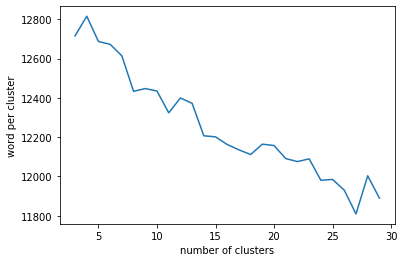

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(3,30),wcss)
plt.xlabel('number of clusters')
plt.ylabel('word per cluster')
plt.show()

In [115]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("-----------------------")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
-----------------------
 year
 day
 tweet
 didnt
 happy
 got
 leap
 start
 two
 even

Cluster 1:
-----------------------
 follow
 gratitude
 dm
 love
 share
 we
 much
 mauradonohoe
 kathrynristic
 katem

Cluster 2:
-----------------------
 tweet
 one
 good
 like
 rt
 say
 back
 got
 read
 best

Cluster 3:
-----------------------
 show
 nyour
 sjschauer
 cmon
 out
 damnezzy
 follower
 like
 respect
 hbssgcstan

Cluster 4:
-----------------------
 tell
 better
 please
 wont
 twitter
 feel
 aftsyd
 picking
 regret
 tobythefox

Cluster 5:
-----------------------
 well
 actually
 work
 back
 georgesiuver
 picture
 night
 waiting
 huntermoonshot
 owusuansahjere

Cluster 6:
-----------------------
 yes
 sign
 point
 see
 definitely
 tugbabodrumlu
 leobeletsky
 waiting
 hongtopia
 hagridfcb

Cluster 7:
-----------------------
 dm
 sliding
 right
 httpstcogiddzoqv
 yup
 briannabeckeru
 httpstcouvcebeu
 normanisnack
 httpstcoqiacpiyyxf
 tinaaaclavell

Cluster 8: